In [34]:
!pip3 install pandas numpy matplotlib seaborn scipy

646.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


# Turkish Employment and Salary Analysis

This notebook analyzes employment and salary data from various sectors in Turkey. We'll explore:
- Salary distributions
- Gender differences
- Experience level impact
- Company size correlations
- Work format preferences

In [36]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plotting style - using updated syntax
plt.style.use('default')  # or you can use 'default', 'classic', 'dark_background'
sns.set_theme()  # This is the modern way to set seaborn's theme
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# For Jupyter notebooks
%matplotlib inline

## Data Loading and Initial Exploration

In [ ]:
# Load the dataset
df = pd.read_csv('Cleaned_Dataset.csv')

# Clean outliers for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
df = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Basic Statistics and Distribution Analysis

Basic Statistics for Numerical Columns:


,ID,Average_Salary_Numeric
count,1539.00,1539.00
mean,782.57,38295.97
std,449.25,18895.84
min,2.00,15000.00
25%,395.50,25500.00
50%,780.00,35500.00
75%,1169.50,45500.00
max,1562.00,110500.00


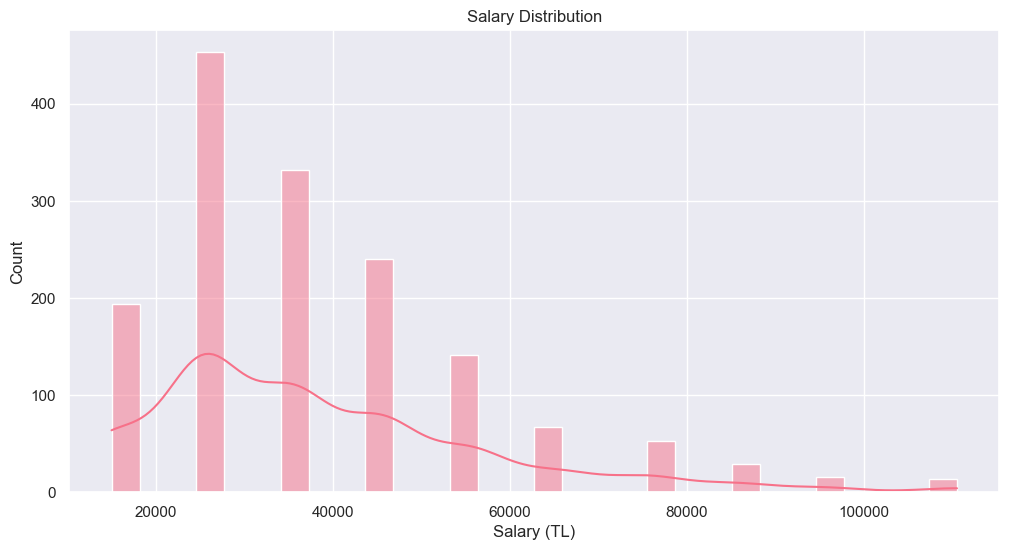

In [ ]:
# Calculate basic statistics
numerical_stats = df.describe()
print("Basic Statistics for Numerical Columns:")
display(numerical_stats)

# Plot salary distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Average_Salary_Numeric', bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (TL)')
plt.ylabel('Count')
plt.show()

## Gender Analysis

Gender Distribution (%):

Gender
Kadın                   87.91
Erkek                   11.83
Belirtmek Istemiyorum    0.26
Name: proportion, dtype: float64


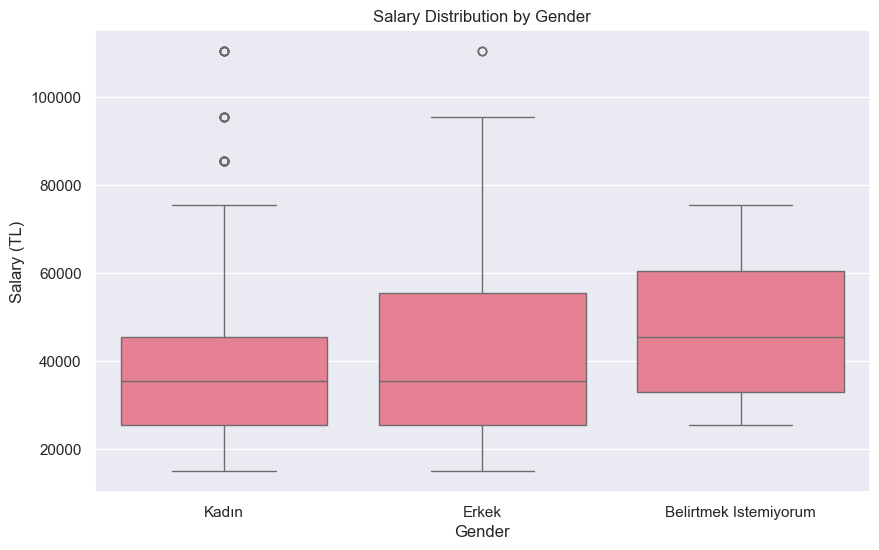


Gender Salary Statistics:


,mean,median,std,count
Gender,,,,
Belirtmek Istemiyorum,48000.00,45500.00,22173.56,4
Erkek,43340.66,35500.00,21090.49,182
Kadın,37588.69,35500.00,18475.09,1353


In [ ]:
# Gender distribution
gender_dist = df['Gender'].value_counts(normalize=True) * 100
print("Gender Distribution (%):\n")
print(gender_dist)

# Gender salary comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Average_Salary_Numeric', data=df)
plt.title('Salary Distribution by Gender')
plt.ylabel('Salary (TL)')
plt.show()

# Calculate gender pay statistics
gender_stats = df.groupby('Gender')['Average_Salary_Numeric'].agg(['mean', 'median', 'std', 'count'])
print("\nGender Salary Statistics:")
display(gender_stats)

## Experience Level Analysis

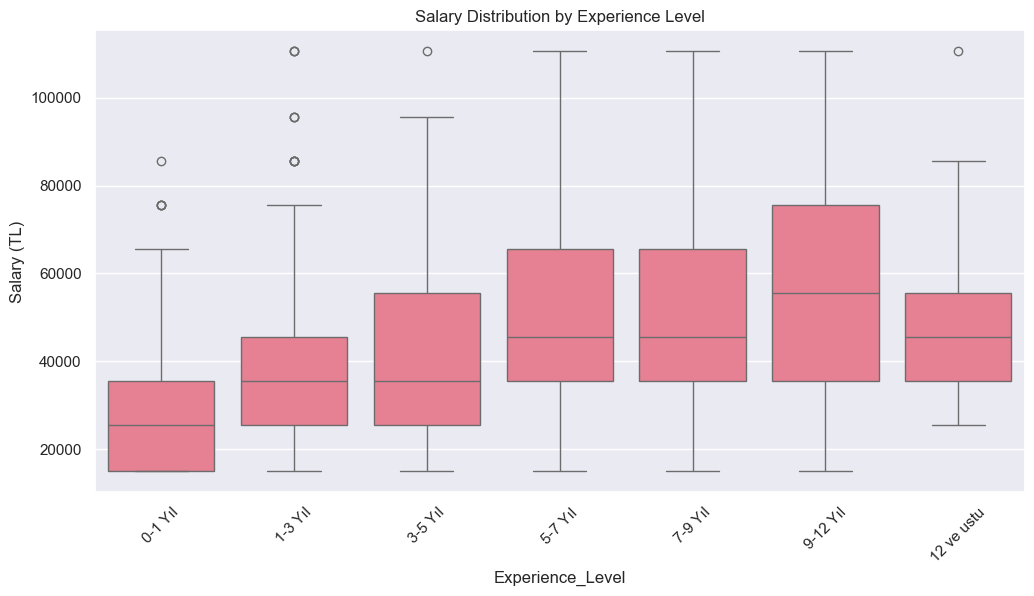


Experience Level Salary Statistics:


/var/folders/hb/7zrym19d5zg3rm5q0w3wcp_40000gn/T/ipykernel_56620/1272349619.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_stats = df.groupby('Experience_Level')['Average_Salary_Numeric'].agg(['mean', 'median', 'std', 'count'])


,mean,median,std,count
Experience_Level,,,,
0-1 Yıl,28565.22,25500.00,13102.87,368
1-3 Yıl,35143.50,35500.00,15798.28,554
3-5 Yıl,42928.33,35500.00,18899.65,293
5-7 Yıl,50183.67,45500.00,21272.21,147
7-9 Yıl,51447.76,45500.00,21202.69,67
9-12 Yıl,55980.00,55500.00,25048.52,50
12 ve ustu,45916.67,45500.00,18046.35,60


In [ ]:
# Experience level salary analysis
exp_order = ['0-1 Yıl', '1-3 Yıl', '3-5 Yıl', '5-7 Yıl', '7-9 Yıl', '9-12 Yıl', '12 ve ustu']
df['Experience_Level'] = pd.Categorical(df['Experience_Level'], categories=exp_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Experience_Level', y='Average_Salary_Numeric', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Experience Level')
plt.ylabel('Salary (TL)')
plt.show()

# Calculate experience level statistics
exp_stats = df.groupby('Experience_Level')['Average_Salary_Numeric'].agg(['mean', 'median', 'std', 'count'])
print("\nExperience Level Salary Statistics:")
display(exp_stats)

## Company Size Analysis

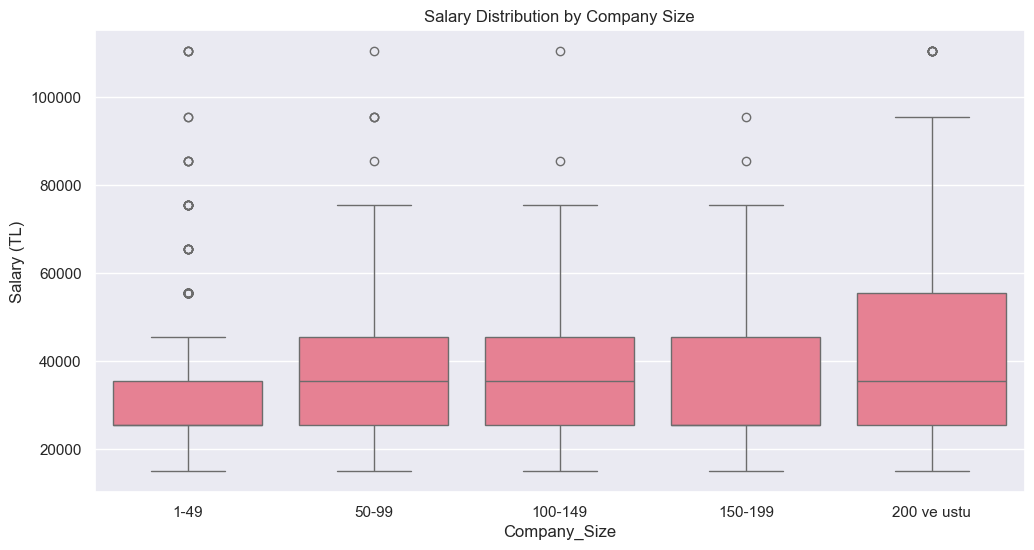


Company Size Salary Statistics:


/var/folders/hb/7zrym19d5zg3rm5q0w3wcp_40000gn/T/ipykernel_56620/3998850222.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_stats = df.groupby('Company_Size')['Average_Salary_Numeric'].agg(['mean', 'median', 'std', 'count'])


,mean,median,std,count
Company_Size,,,,
1-49,31955.08,25500.00,16486.58,512
50-99,38673.47,35500.00,18779.33,147
100-149,37434.34,35500.00,15842.44,99
150-199,35007.04,25500.00,17273.12,71
200 ve ustu,43239.44,35500.00,19675.95,710


In [ ]:
# Company size salary analysis
size_order = ['1-49', '50-99', '100-149', '150-199', '200 ve ustu']
df['Company_Size'] = pd.Categorical(df['Company_Size'], categories=size_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Company_Size', y='Average_Salary_Numeric', data=df)
plt.title('Salary Distribution by Company Size')
plt.ylabel('Salary (TL)')
plt.show()

# Calculate company size statistics
size_stats = df.groupby('Company_Size')['Average_Salary_Numeric'].agg(['mean', 'median', 'std', 'count'])
print("\nCompany Size Salary Statistics:")
display(size_stats)

## Work Format Analysis

Work Format Distribution (%):

Work_Format
Ofiste    57.18
Hybrid    26.32
Uzaktan   16.50
Name: proportion, dtype: float64


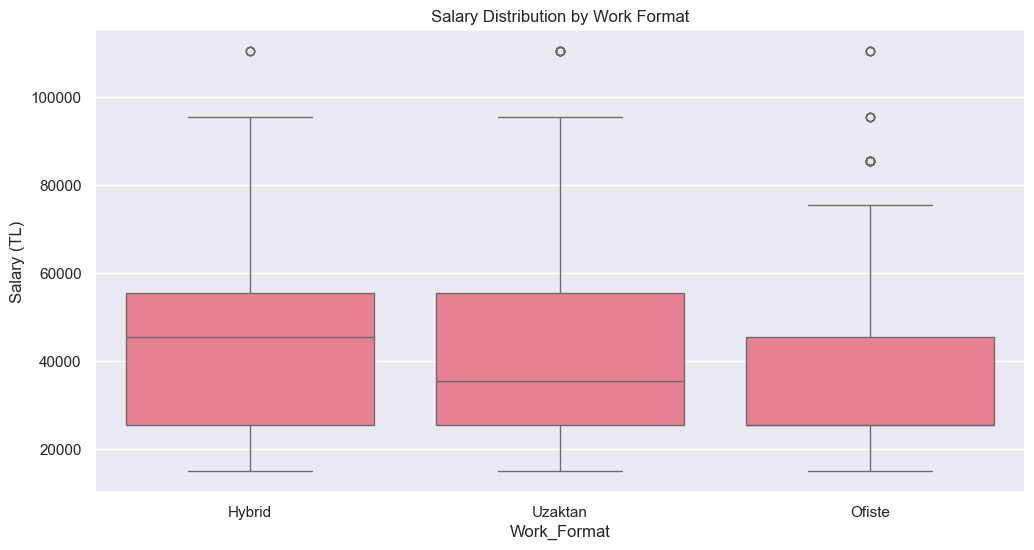


Work Format Salary Statistics:


,mean,median,std,count
Work_Format,,,,
Hybrid,44018.52,45500.00,19068.25,405
Ofiste,33919.32,25500.00,16384.76,880
Uzaktan,44334.65,35500.00,22395.61,254


In [ ]:
# Work format distribution and salary analysis
work_format_dist = df['Work_Format'].value_counts(normalize=True) * 100
print("Work Format Distribution (%):\n")
print(work_format_dist)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Work_Format', y='Average_Salary_Numeric', data=df)
plt.title('Salary Distribution by Work Format')
plt.ylabel('Salary (TL)')
plt.show()

# Calculate work format statistics
format_stats = df.groupby('Work_Format')['Average_Salary_Numeric'].agg(['mean', 'median', 'std', 'count'])
print("\nWork Format Salary Statistics:")
display(format_stats)

## Sector Analysis

Sector Analysis:


,Mean Salary,Median Salary,Std Salary,Count,Women Percentage
Sector,,,,,
Havacılık,53739.13,55500.00,18548.38,23,95.65
Bilgi Teknolojileri ve Yazılım,46476.10,45500.00,22181.79,272,79.78
Finans ve Muhasebe,41727.72,35500.00,20579.30,101,89.11
Otomotiv,40409.09,35500.00,16868.44,77,87.01
Telekomünikasyon,39196.97,35500.00,23045.79,33,96.97
Perakende ve E-tıcaret,39060.24,35500.00,17851.08,83,89.16
İnşaat,38441.67,35500.00,17282.57,60,83.33
Çevre ve Enerji,38307.69,35500.00,21634.27,26,84.62
Sağlık ve Tıp,36536.46,35500.00,18077.21,96,96.88


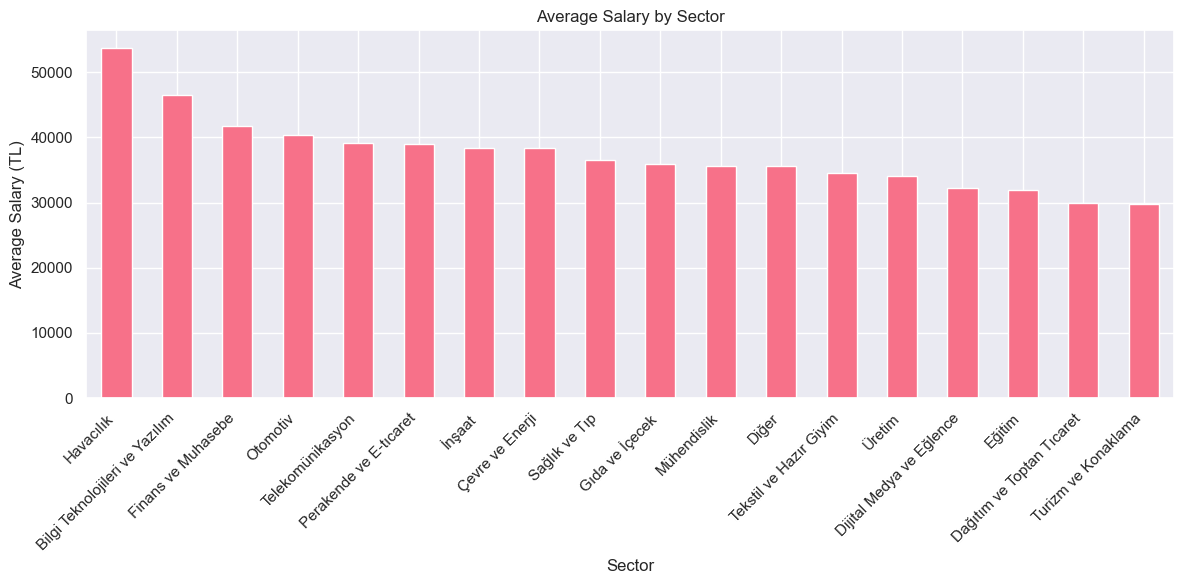

In [ ]:
# Analyze sectors
sector_stats = df.groupby('Sector').agg({
    'Average_Salary_Numeric': ['mean', 'median', 'std', 'count'],
    'Gender': lambda x: (x == 'Kadın').mean() * 100  # Calculate percentage of women
}).round(2)

sector_stats.columns = ['Mean Salary', 'Median Salary', 'Std Salary', 'Count', 'Women Percentage']
sector_stats = sector_stats.sort_values('Mean Salary', ascending=False)

print("Sector Analysis:")
display(sector_stats)

# Plot top sectors by average salary
plt.figure(figsize=(12, 6))
sector_stats['Mean Salary'].plot(kind='bar')
plt.title('Average Salary by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Salary (TL)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Position Analysis

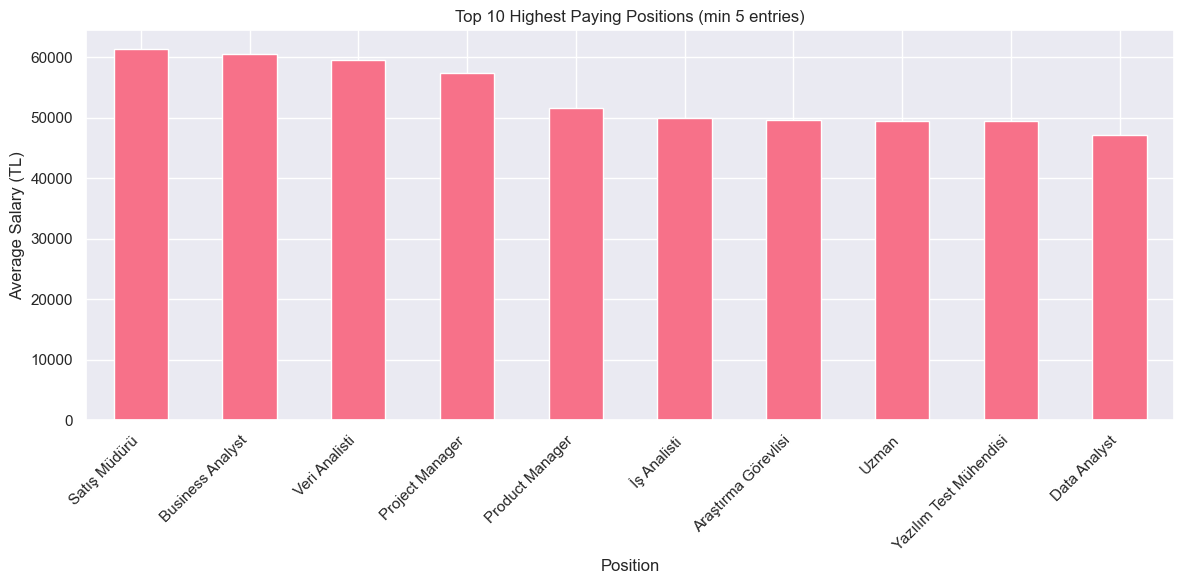


Top 10 Positions by Salary (with at least 5 entries):


,mean,count
Position,,
Satış Müdürü,61400.00,5
Business Analyst,60500.00,10
Veri Analisti,59500.00,5
Project Manager,57500.00,5
Product Manager,51687.50,8
İş Analisti,50062.50,24
Araştırma Görevlisi,49714.29,7
Uzman,49500.00,5
Yazılım Test Mühendisi,49500.00,5


In [ ]:
# Analyze top positions by salary
position_stats = df.groupby('Position')['Average_Salary_Numeric'].agg(['mean', 'count'])
top_positions = position_stats[position_stats['count'] >= 5]  # Filter positions with at least 5 entries
top_positions = top_positions.sort_values('mean', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_positions['mean'].plot(kind='bar')
plt.title('Top 10 Highest Paying Positions (min 5 entries)')
plt.xlabel('Position')
plt.ylabel('Average Salary (TL)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 10 Positions by Salary (with at least 5 entries):")
display(top_positions)

## Correlation Analysis

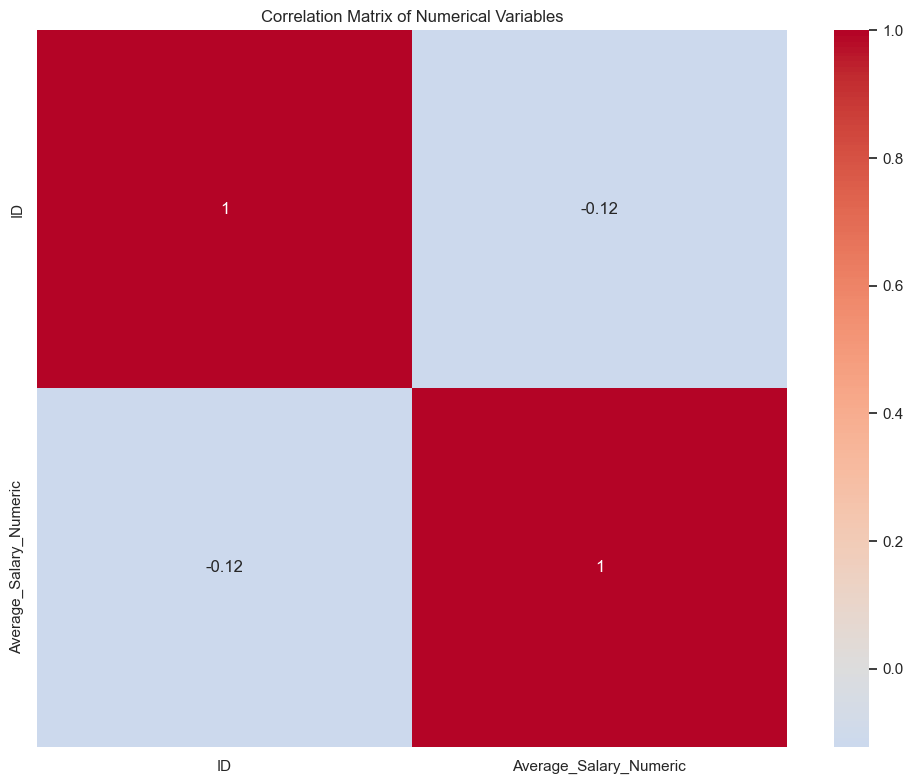

In [ ]:
# Create correlation matrix
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

## Location Analysis

Location Analysis:


,Mean Salary,Median Salary,Count,Women Percentage
Location,,,,
Türkiye,37790.97,35500.00,1495,87.83
Yurt dışı,55454.55,45500.00,44,90.91


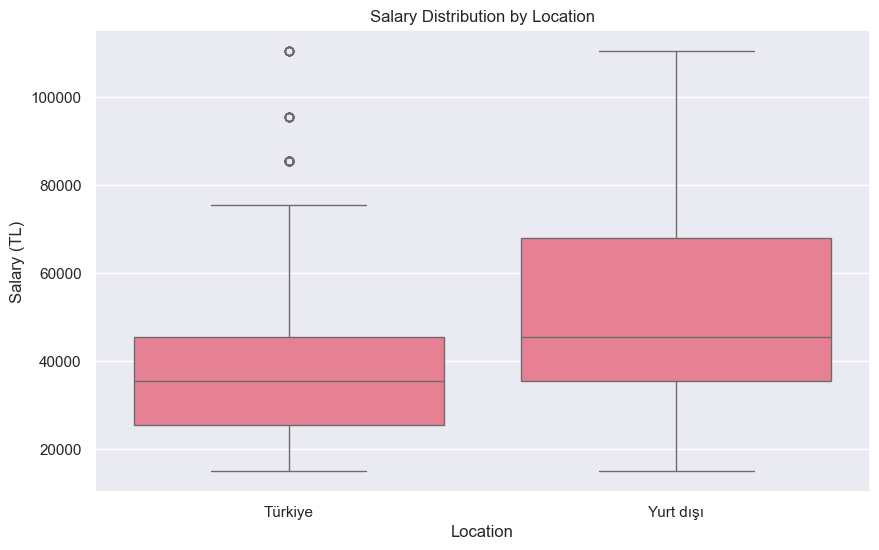

In [ ]:
# Analyze salaries by location
location_stats = df.groupby('Location').agg({
    'Average_Salary_Numeric': ['mean', 'median', 'count'],
    'Gender': lambda x: (x == 'Kadın').mean() * 100
}).round(2)

location_stats.columns = ['Mean Salary', 'Median Salary', 'Count', 'Women Percentage']
print("Location Analysis:")
display(location_stats)

# Plot salary comparison by location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Average_Salary_Numeric', data=df)
plt.title('Salary Distribution by Location')
plt.ylabel('Salary (TL)')
plt.show()

## Key Findings Summary

In [ ]:
# Calculate and print key findings
print("Key Findings:")
print("-" * 50)
print(f"Average Salary: {df['Average_Salary_Numeric'].mean():,.2f} TL")
print(f"Median Salary: {df['Average_Salary_Numeric'].median():,.2f} TL")
print(f"Most Common Work Format: {df['Work_Format'].mode()[0]}")
print(f"Most Common Company Size: {df['Company_Size'].mode()[0]}")
print(f"Most Common Experience Level: {df['Experience_Level'].mode()[0]}")
print(f"Gender Ratio (Women:Men): {len(df[df['Gender']=='Kadın'])}:{len(df[df['Gender']=='Erkek'])}")
print(f"Remote Work Percentage: {(df['Work_Format']=='Uzaktan').mean()*100:.1f}%")

# Calculate salary growth with experience
entry_level = df[df['Experience_Level']=='0-1 Yıl']['Average_Salary_Numeric'].mean()
senior_level = df[df['Experience_Level']=='12 ve ustu']['Average_Salary_Numeric'].mean()
salary_growth = ((senior_level - entry_level) / entry_level) * 100
print(f"Salary Growth (Entry to Senior): {salary_growth:.1f}%")

# Gender pay gap
men_salary = df[df['Gender']=='Erkek']['Average_Salary_Numeric'].mean()
women_salary = df[df['Gender']=='Kadın']['Average_Salary_Numeric'].mean()
gender_gap = ((men_salary - women_salary) / men_salary) * 100
print(f"Gender Pay Gap: {gender_gap:.1f}%")

Key Findings:
--------------------------------------------------
Average Salary: 38,295.97 TL
Median Salary: 35,500.00 TL
Most Common Work Format: Ofiste
Most Common Company Size: 200 ve ustu
Most Common Experience Level: 1-3 Yıl
Gender Ratio (Women:Men): 1353:182
Remote Work Percentage: 16.5%
Salary Growth (Entry to Senior): 60.7%
Gender Pay Gap: 13.3%


## Deep Dive: Experience vs. Salary by Gender

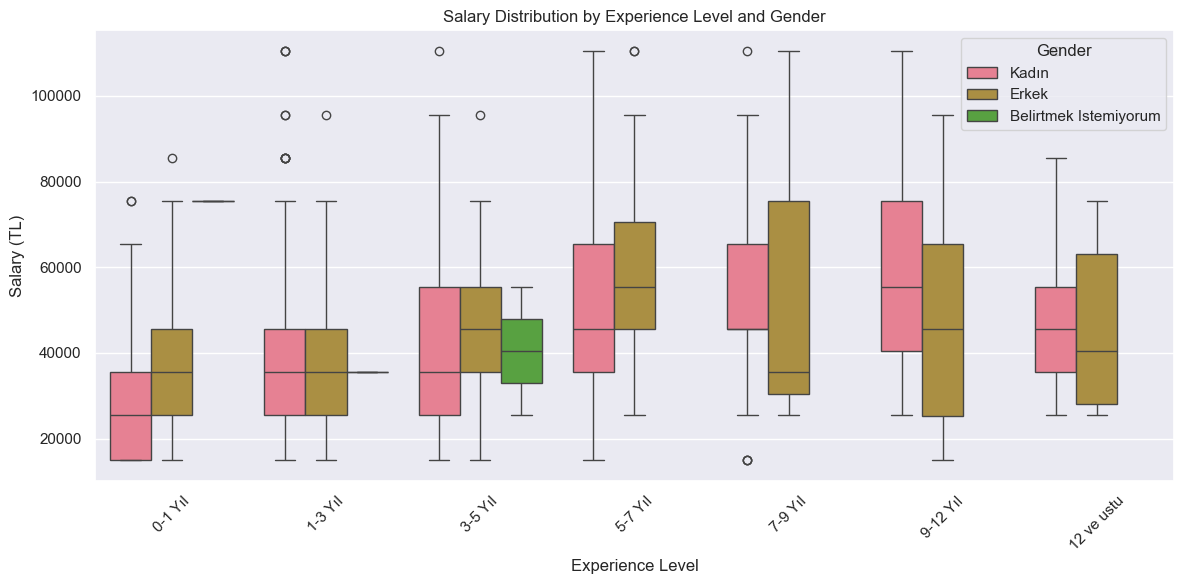


Detailed Experience Level Statistics by Gender:


/var/folders/hb/7zrym19d5zg3rm5q0w3wcp_40000gn/T/ipykernel_56620/3758457099.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  exp_gender_stats = df.pivot_table(
/var/folders/hb/7zrym19d5zg3rm5q0w3wcp_40000gn/T/ipykernel_56620/3758457099.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  exp_gender_stats = df.pivot_table(


mean                    \
Gender           Belirtmek Istemiyorum    Erkek    Kadın   
Experience_Level                                           
0-1 Yıl                       75500.00 35406.98 27512.35   
1-3 Yıl                       35500.00 38898.44 34651.33   
3-5 Yıl                       40500.00 48395.83 42455.06   
5-7 Yıl                            NaN 58543.48 48633.06   
7-9 Yıl                            NaN 52318.18 51276.79   
9-12 Yıl                           NaN 48214.29 57244.19   
12 ve ustu                         NaN 45500.00 46000.00   

                                 count              
Gender           Belirtmek Istemiyorum Erkek Kadın  
Experience_Level                                    
0-1 Yıl                              1    43   324  
1-3 Yıl                              1    64   489  
3-5 Yıl                              2    24   267  
5-7 Yıl                              0    23   124  
7-9 Yıl                              0    11    56  
9-12 Yıl                             0     7    43  
12 ve ustu                           0    10    50

In [ ]:
# Create experience vs salary analysis by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Experience_Level', y='Average_Salary_Numeric', hue='Gender', data=df)
plt.title('Salary Distribution by Experience Level and Gender')
plt.xlabel('Experience Level')
plt.ylabel('Salary (TL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate detailed statistics
exp_gender_stats = df.pivot_table(
    values='Average_Salary_Numeric',
    index='Experience_Level',
    columns='Gender',
    aggfunc=['mean', 'count']
).round(2)

print("\nDetailed Experience Level Statistics by Gender:")
display(exp_gender_stats)

## Work Format Trends Analysis

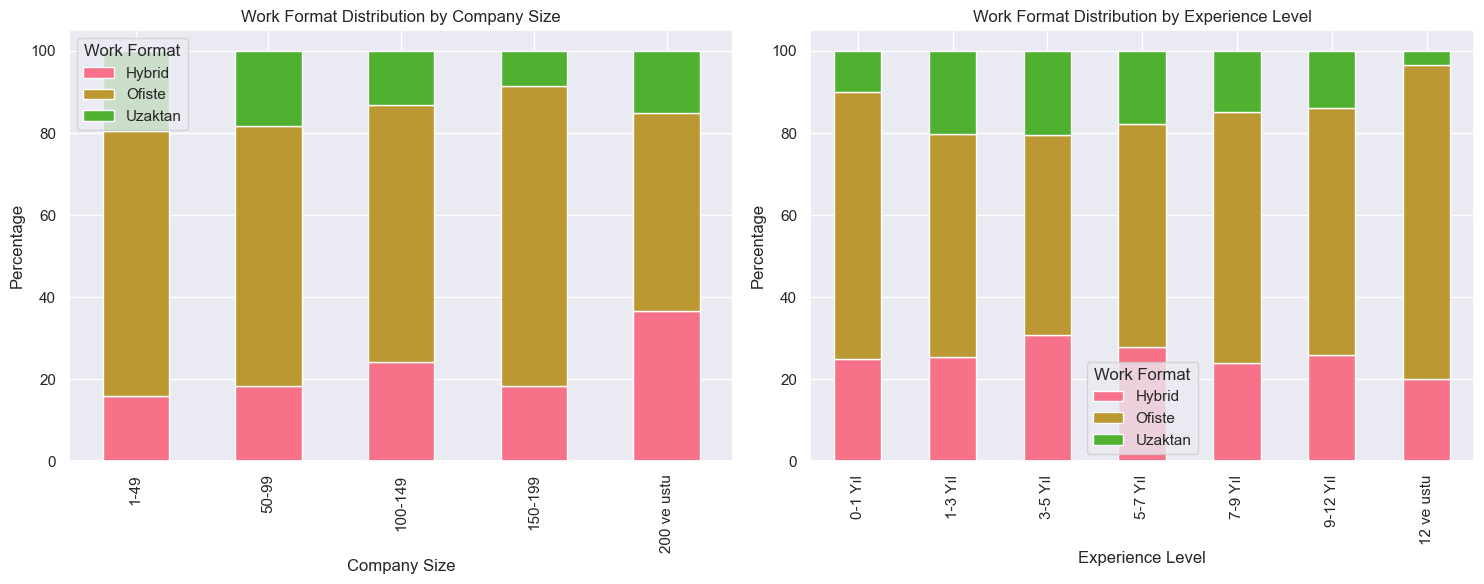


Work Format Distribution by Company Size (%):



Work_Format,Hybrid,Ofiste,Uzaktan
Company_Size,,,
1-49,15.82,64.65,19.53
50-99,18.37,63.27,18.37
100-149,24.24,62.63,13.13
150-199,18.31,73.24,8.45
200 ve ustu,36.62,48.17,15.21



Work Format Distribution by Experience Level (%):



Work_Format,Hybrid,Ofiste,Uzaktan
Experience_Level,,,
0-1 Yıl,25.00,64.95,10.05
1-3 Yıl,25.45,54.33,20.22
3-5 Yıl,30.72,48.81,20.48
5-7 Yıl,27.89,54.42,17.69
7-9 Yıl,23.88,61.19,14.93
9-12 Yıl,26.00,60.00,14.00
12 ve ustu,20.00,76.67,3.33


In [ ]:
# Analyze work format preferences by company size and experience
work_format_by_size = pd.crosstab(df['Company_Size'], df['Work_Format'], normalize='index') * 100
work_format_by_exp = pd.crosstab(df['Experience_Level'], df['Work_Format'], normalize='index') * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

work_format_by_size.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Work Format Distribution by Company Size')
ax1.set_xlabel('Company Size')
ax1.set_ylabel('Percentage')
ax1.legend(title='Work Format')

work_format_by_exp.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Work Format Distribution by Experience Level')
ax2.set_xlabel('Experience Level')
ax2.set_ylabel('Percentage')
ax2.legend(title='Work Format')

plt.tight_layout()
plt.show()

print("\nWork Format Distribution by Company Size (%):\n")
display(work_format_by_size)

print("\nWork Format Distribution by Experience Level (%):\n")
display(work_format_by_exp)

## Sector-Specific Analysis


Analysis for Bilgi Teknolojileri ve Yazılım:
--------------------------------------------------
Number of employees: 272
Average salary: 46,476.10 TL
Women percentage: 79.8%
Remote work percentage: 40.4%


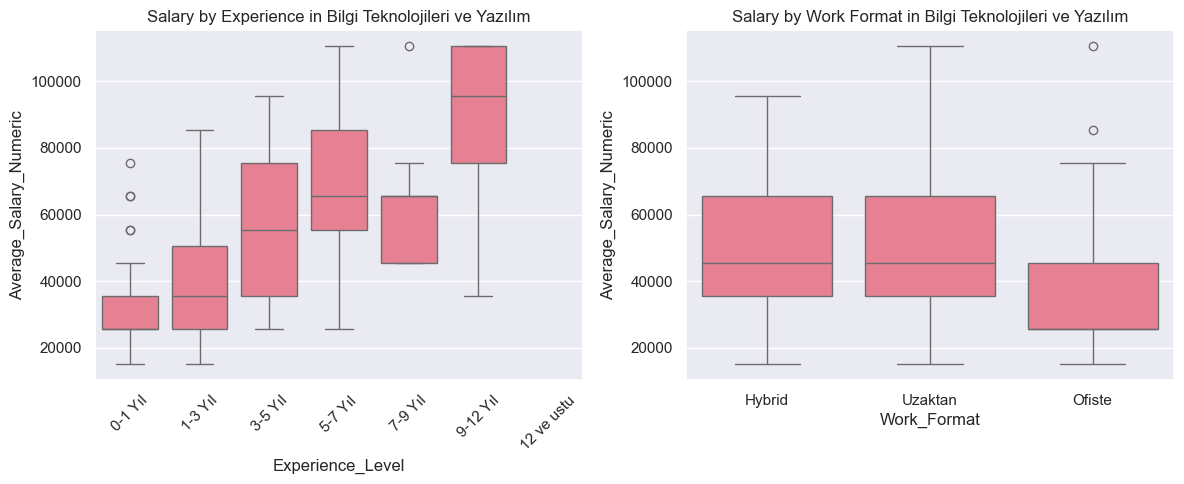


Analysis for Diğer:
--------------------------------------------------
Number of employees: 243
Average salary: 35,666.67 TL
Women percentage: 90.5%
Remote work percentage: 14.4%


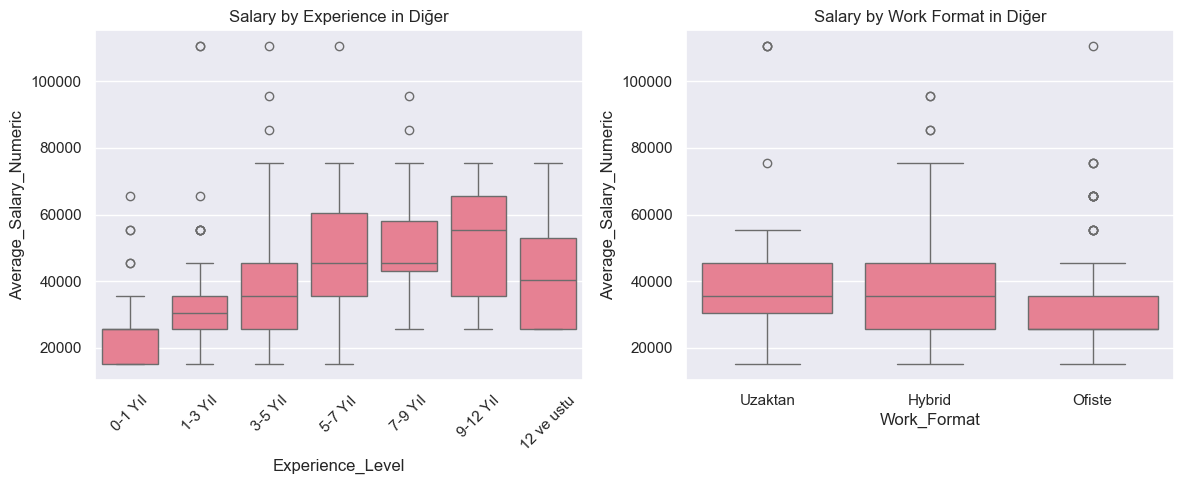


Analysis for Mühendislik:
--------------------------------------------------
Number of employees: 112
Average salary: 35,687.50 TL
Women percentage: 88.4%
Remote work percentage: 3.6%


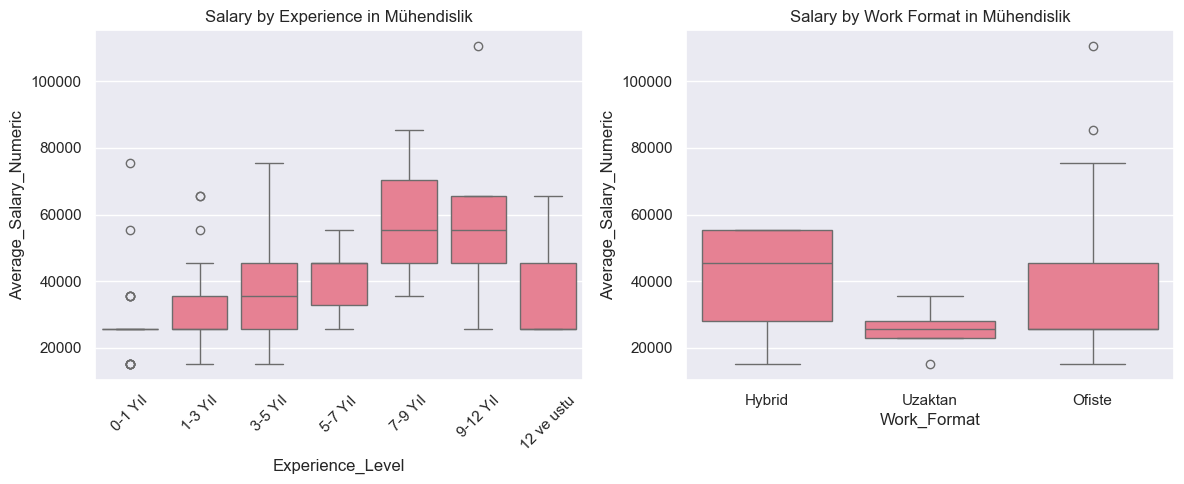

In [ ]:
# Analyze salary trends within each sector
def sector_analysis(sector_name):
    sector_data = df[df['Sector'] == sector_name]
    
    print(f"\nAnalysis for {sector_name}:")
    print("-" * 50)
    print(f"Number of employees: {len(sector_data)}")
    print(f"Average salary: {sector_data['Average_Salary_Numeric'].mean():,.2f} TL")
    print(f"Women percentage: {(sector_data['Gender']=='Kadın').mean()*100:.1f}%")
    print(f"Remote work percentage: {(sector_data['Work_Format']=='Uzaktan').mean()*100:.1f}%")
    
    # Plot salary distribution
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Experience_Level', y='Average_Salary_Numeric', data=sector_data)
    plt.title(f'Salary by Experience in {sector_name}')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Work_Format', y='Average_Salary_Numeric', data=sector_data)
    plt.title(f'Salary by Work Format in {sector_name}')
    
    plt.tight_layout()
    plt.show()

# Analyze top 3 sectors by number of employees
top_sectors = df['Sector'].value_counts().head(3).index
for sector in top_sectors:
    sector_analysis(sector)

## Salary Progression Analysis

/var/folders/hb/7zrym19d5zg3rm5q0w3wcp_40000gn/T/ipykernel_56620/3480655220.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  salary_progression = df.pivot_table(


<Figure size 1200x600 with 0 Axes>

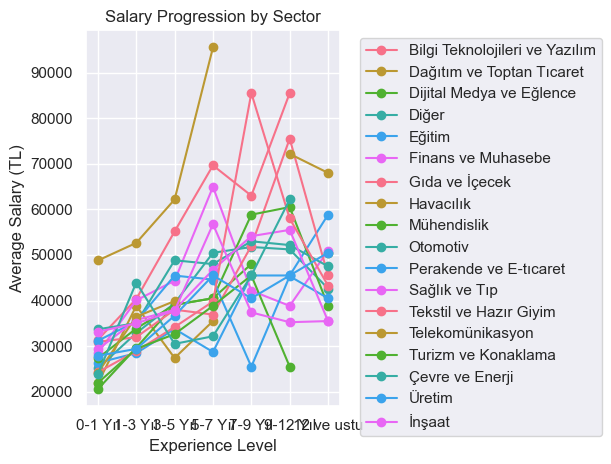


Salary Progression Details:


Sector,Bilgi Teknolojileri ve Yazılım,Dağıtım ve Toptan Tıcaret,Dijital Medya ve Eğlence,Diğer,Eğitim,Finans ve Muhasebe,Gıda ve İçecek,Havacılık,Mühendislik,Otomotiv,Perakende ve E-tıcaret,Sağlık ve Tıp,Tekstil ve Hazır Giyim,Telekomünikasyon,Turizm ve Konaklama,Çevre ve Enerji,Üretim,İnşaat
Experience_Level,,,,,,,,,,,,,,,,,,
0-1 Yıl,31409.09,21833.33,20566.67,25109.09,26350.00,28477.27,30944.44,48791.67,27338.71,33695.65,31184.21,29326.09,24263.16,24166.67,21944.44,23857.14,27892.86,33166.67
1-3 Yıl,40330.43,38833.33,29651.52,32877.66,28465.52,40042.86,31965.52,52642.86,33864.86,35043.48,35431.82,35728.57,28925.00,36450.00,29400.00,43950.00,29400.00,35000.00
3-5 Yıl,55155.17,27400.00,39071.43,39404.76,33769.23,44361.11,38000.00,62166.67,39080.00,48833.33,45480.00,37950.00,34187.50,39888.89,32642.86,30500.00,36687.50,37769.23
5-7 Yıl,69637.93,35500.00,40500.00,50466.67,28722.22,64944.44,36928.57,95500.00,40500.00,48000.00,44590.91,46750.00,39785.71,NaN,38833.33,32166.67,45500.00,56750.00
7-9 Yıl,63000.00,NaN,48000.00,51750.00,45500.00,42166.67,52000.00,NaN,58833.33,53000.00,25500.00,54125.00,85500.00,NaN,45500.00,45500.00,40500.00,37400.00
9-12 Yıl,85500.00,NaN,NaN,51214.29,45500.00,38833.33,75500.00,NaN,60500.00,52166.67,45333.33,55500.00,58000.00,72166.67,25500.00,62166.67,45500.00,35250.00
12 ve ustu,NaN,NaN,50500.00,42642.86,58833.33,50954.55,45500.00,NaN,38833.33,47500.00,40500.00,35500.00,43277.78,68000.00,NaN,NaN,50500.00,35500.00


In [ ]:
# Analyze salary progression by experience level across different sectors
salary_progression = df.pivot_table(
    values='Average_Salary_Numeric',
    index='Experience_Level',
    columns='Sector',
    aggfunc='mean'
).round(2)

plt.figure(figsize=(12, 6))
salary_progression.plot(marker='o')
plt.title('Salary Progression by Sector')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (TL)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nSalary Progression Details:")
display(salary_progression)

## Company Size Impact Analysis

/var/folders/hb/7zrym19d5zg3rm5q0w3wcp_40000gn/T/ipykernel_56620/2975870154.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_impact = df.groupby('Company_Size').agg({
/var/folders/hb/7zrym19d5zg3rm5q0w3wcp_40000gn/T/ipykernel_56620/2975870154.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)


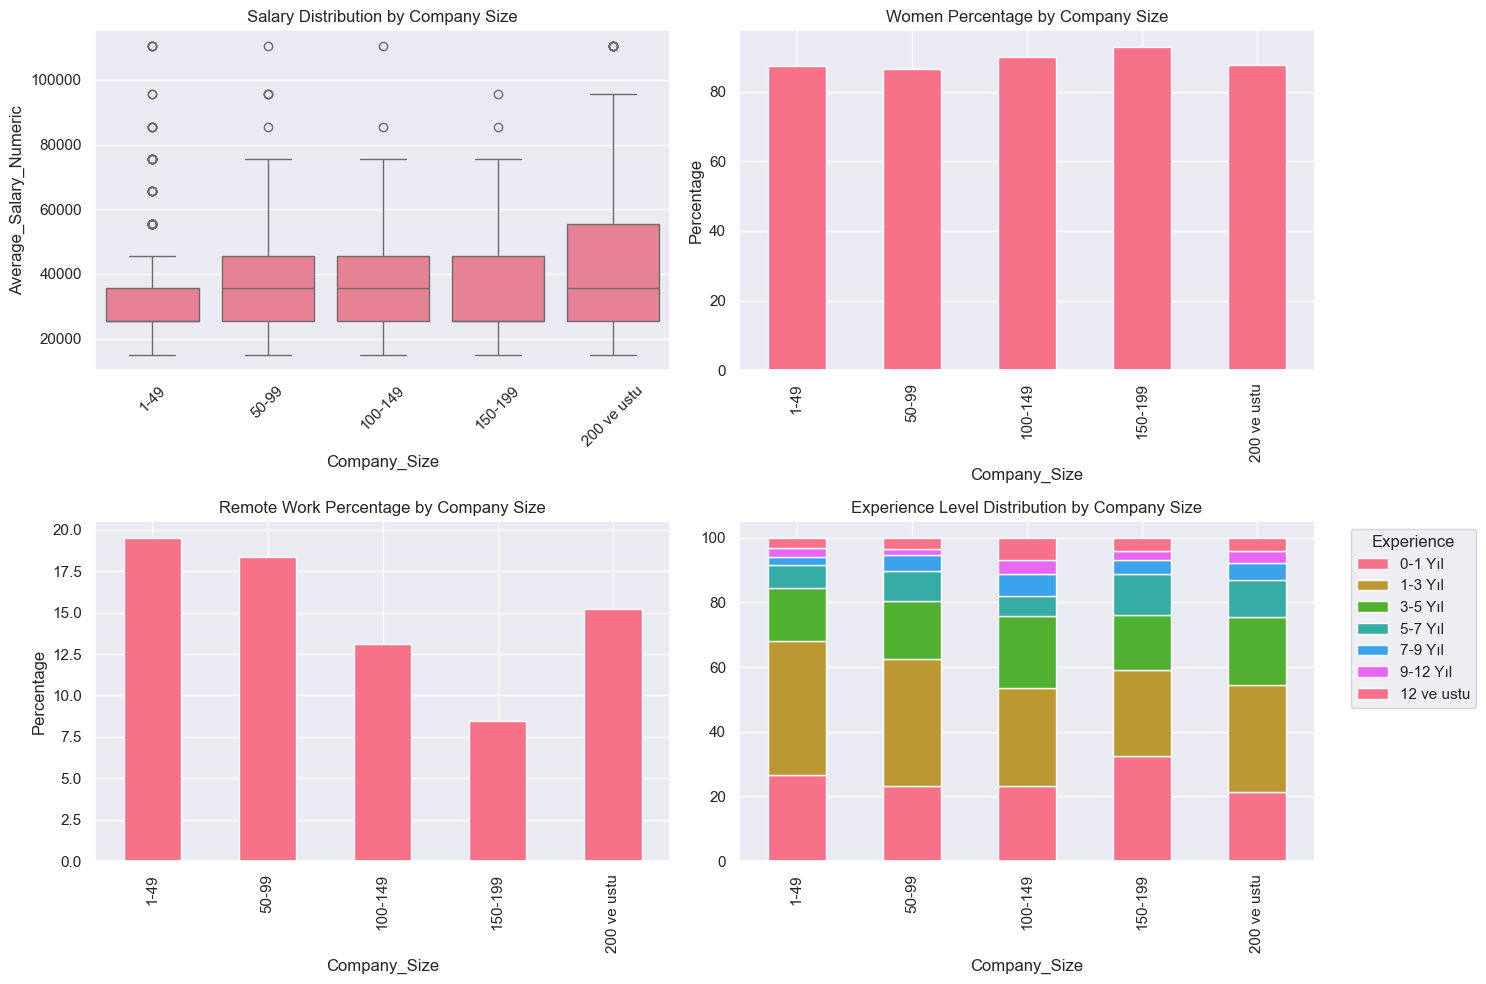


Detailed Company Size Impact Analysis:


,Mean Salary,Median Salary,Std Salary,Women %,Remote %
Company_Size,,,,,
1-49,31955.08,25500.00,16486.58,87.50,19.53
50-99,38673.47,35500.00,18779.33,86.39,18.37
100-149,37434.34,35500.00,15842.44,89.90,13.13
150-199,35007.04,25500.00,17273.12,92.96,8.45
200 ve ustu,43239.44,35500.00,19675.95,87.75,15.21


In [ ]:
# Analyze how company size affects various metrics
size_impact = df.groupby('Company_Size').agg({
    'Average_Salary_Numeric': ['mean', 'median', 'std'],
    'Gender': lambda x: (x == 'Kadın').mean() * 100,
    'Work_Format': lambda x: (x == 'Uzaktan').mean() * 100
}).round(2)

size_impact.columns = ['Mean Salary', 'Median Salary', 'Std Salary', 'Women %', 'Remote %']

# Plot company size metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Salary by company size
sns.boxplot(x='Company_Size', y='Average_Salary_Numeric', data=df, ax=axes[0,0])
axes[0,0].set_title('Salary Distribution by Company Size')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)

# Gender distribution
size_impact['Women %'].plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Women Percentage by Company Size')
axes[0,1].set_ylabel('Percentage')

# Remote work percentage
size_impact['Remote %'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Remote Work Percentage by Company Size')
axes[1,0].set_ylabel('Percentage')

# Experience level distribution
exp_by_size = pd.crosstab(df['Company_Size'], df['Experience_Level'], normalize='index') * 100
exp_by_size.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Experience Level Distribution by Company Size')
axes[1,1].legend(title='Experience', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

print("\nDetailed Company Size Impact Analysis:")
display(size_impact)

## Final Insights and Recommendations

In [ ]:
# Calculate and present key insights
insights = {
    'Salary Range': f"{df['Average_Salary_Numeric'].min():,.0f} - {df['Average_Salary_Numeric'].max():,.0f} TL",
    'Most Common Work Format': df['Work_Format'].mode()[0],
    'Highest Paying Sector': sector_stats.index[0],
    'Remote Work Premium': f"{((df[df['Work_Format']=='Uzaktan']['Average_Salary_Numeric'].mean() / df[df['Work_Format']=='Ofiste']['Average_Salary_Numeric'].mean()) - 1) * 100:.1f}%",
    'Experience Premium': f"{((df[df['Experience_Level']=='12 ve ustu']['Average_Salary_Numeric'].mean() / df[df['Experience_Level']=='0-1 Yıl']['Average_Salary_Numeric'].mean()) - 1) * 100:.1f}%",
    'Large Company Premium': f"{((df[df['Company_Size']=='200 ve ustu']['Average_Salary_Numeric'].mean() / df[df['Company_Size']=='1-49']['Average_Salary_Numeric'].mean()) - 1) * 100:.1f}%"
}

print("Key Insights:")
print("-" * 50)
for key, value in insights.items():
    print(f"{key}: {value}")

# Save important findings to CSV
sector_stats.to_csv('sector_analysis.csv')
size_impact.to_csv('company_size_impact.csv')
salary_progression.to_csv('salary_progression.csv')

print("\nAnalysis complete. Detailed results have been saved to CSV files.")

Key Insights:
--------------------------------------------------
Salary Range: 15,000 - 110,500 TL
Most Common Work Format: Ofiste
Highest Paying Sector: Havacılık
Remote Work Premium: 30.7%
Experience Premium: 60.7%
Large Company Premium: 35.3%

Analysis complete. Detailed results have been saved to CSV files.
